In [1]:
import sklearn.datasets as ds
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = ds.load_iris()

In [3]:
x = df.data
y = df.target

In [4]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [5]:
mlp = MLPClassifier()

In [6]:
mlp.fit(x_train , y_train)

C:\Users\Harshpreet Singh\Anacondajupyternb\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [7]:
y_pred = mlp.predict(x_test)

In [8]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [9]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [10]:
print('accuracy score : ' , accuracy_score(y_test , y_pred))

accuracy score :  1.0


In [11]:
print('-'*50)
print('Confusion matrix : \n' , confusion_matrix(y_test , y_pred))
print('-'*50)
print('Classification report : \n' , classification_report(y_test , y_pred))

--------------------------------------------------
Confusion matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
--------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



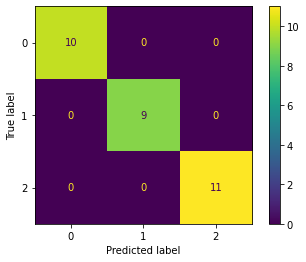

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp , x_test , y_test)

In [13]:
from sklearn.metrics import roc_auc_score , classification_report , roc_curve , plot_precision_recall_curve

In [14]:
proba = mlp.predict_proba(x_test)

In [15]:
proba.shape

(30, 3)

In [16]:
fpr1, tpr1, thresh1 = roc_curve(y_test, proba[:,1], pos_label=1)

In [23]:
auc = roc_auc_score(y_test , proba , multi_class= 'ovo')

In [24]:
auc

1.0

In [ ]:
import numpy as np
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
#plot_precision_recall_curve(mlp , y_test , proba)

In [ ]:
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes = y_test.shape[1]
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(fpr1, tpr1,color='orange', label='MLP')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
#lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
proba = proba[:, 1]
# predict class values
#yhat = mlp.predict(testX)
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, proba)
mlp_f1, mlp_auc = f1_score(y_test , y_pred), auc(mlp_recall, mlp_precision)
# summarize scores
print('MLP: f1=%.3f auc=%.3f' % (mlp_f1, mlp_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(mlp_recall, mlp_precision, marker='.', label='MLP')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [26]:
y_pred = proba >= 0.5
y_pred

array([[False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False]])